River Kelly & Kyler Gappa

CSCI-347: Data Mining

Exploratory Data Analysis

# Introduction

The dataset that we have chosen is found is the [Computer Hardware](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware) data set, and is used to compare performance of multiple different computer chips. This data was uploaded by Phillip Ein-Dor and Jacob Feldmesser. Of the 9 attributes and 209 instances, there are no missing values in this data set. There are 2 categorical and 8 numerical attributes. The categorical attributes would probably be best handled with a label encoding because it is useful for identifying differing model types without expanding the dataset too far. This data is interseting as it can shed light on how effective certain parts are and how to shop for a high value deal. ERP is most likely the most descriptive as it is the calculated number that was tested against.

## Data Set Details

| Data Property | Info. |
| :-- | :-- |
| Number of Instances | 209 |
| Number of Attributes | 10 |
| Missing Values | No |

### Attribute Information

1. `vendor name`: 30 *(adviser, amdahl, apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang)*
2. `Model Name`: many unique symbols
3. `MYCT`: machine cycle time in nanoseconds (integer)
4. `MMIN`: minimum main memory in kilobytes (integer)
5. `MMAX`: maximum main memory in kilobytes (integer)
6. `CACH`: cache memory in kilobytes (integer)
7. `CHMIN`: minimum channels in units (integer)
8. `CHMAX`: maximum channels in units (integer)
9. `PRP`: published relative performance (integer)
10. `ERP`: estimated relative performance from the original article (integer)

## Setup Code

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILENAME = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
DATA_COL_NAME_DICT = {
    'Vendor Name': 'Vendor Name', 
    'Model Name': 'Model Name', 
    'MYCT': 'machine cycle time in nanoseconds', 
    'MMIN': 'minimum main memory in kilobytes', 
    'MMAX': 'maximum main memory in kilobytes', 
    'CACH': 'cache memory in kilobytes', 
    'CHMIN': 'minimum channels in units', 
    'CHMAX': 'maximum channels in units', 
    'PRP': 'published relative performance', 
    'ERP': 'estimated relative performance from the original article'
}
DATA_COL_NAMES = list(DATA_COL_NAME_DICT.keys())

In [36]:
df = pd.read_csv(DATA_FILENAME,
        names=DATA_COL_NAMES,
        delimiter=',',
        encoding="utf-8",
        skipinitialspace=True
    )

In [37]:
df.head(5)

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [38]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


# Write Python code for data analysis

Use Python to write the following functions, without using any functions with the same purpose in sklearn, pandas, numpy, or any other library (though you may want to use these libraries to check your answers):

In [39]:
def arrayMean(arr):
  sum = 0
  for i in arr: sum += i
  return sum / arr.shape[0]

def arrMin(arr):
    # stored min value
    min_value = None
    # loop through array values
    for i in arr:
        # check if current val is less the stored min
        if min_value is None:
            min_value = i
        elif i < min_value:
            # update stored min value
            min_value = i
    # return min value in array
    return min_value

def arrMax(arr):
    # stored max value
    max_value = None
    # loop through array values
    for i in arr:
        # check if current val is less the stored max
        if max_value is None:
            max_value = i
        elif max_value < i:
            # update stored max value
            max_value = i
    # return main value in array
    return max_value

## (5 points)

A function that will compute the mean of a numerical, multidimensional data set input as a 2-dimensional numpy array.

In [40]:
def multiDimensionalMean(m):
    # output array (i.e. mean array)
    mean = [0] * m.shape[1]
    # iterate over columns
    for col_index in range(m.shape[1]):
        # get column array
        col_arr = m[:,col_index]
        # column mean
        col_mean = arrayMean(col_arr)
        # set column mean to mean (output) array
        mean[col_index] = col_mean
    # return multi-dimensional mean
    return mean

## (5 points)

A function that will compute the estimated covariance between two attributes that are input as one-dimensional numpy vectors.

In [41]:
def covariance(v1, v2 = None):
    if v2 is None: v2 = v1
    # vector 1 mean
    v1_mean = arrayMean(v1)
    # vector 2 mean
    v2_mean = arrayMean(v2)
    # co_var (the covariance between v1 and v2)
    co_var = 0
    # loop through v1 and v2 values
    for i in range(v1.shape[0]):
        co_var += (v1[i] - v1_mean) * (v2[i] - v2_mean)
    # calculate and return the co-variance between v1 and v2
    return (co_var / (v1.shape[0] - 1))

## (5 points)

A function that will compute the correlation between two attributes that are input as two numpy vectors.

In [42]:
def correlation(vi, vj):
    # v_i standard deviation = sqrt(vi co-variance)
    vi_std_div = (covariance(vi) ** (1/2))
    # v_j standard deviation
    vj_std_div = (covariance(vj) ** (1/2))
    # co-variance of vi and vj (v_ij)
    covar_vij = covariance(vi, vj)
    # calculate correlation of vi and vj
    return (covar_vij / (vi_std_div * vj_std_div))

## (5 points)

 A function that will normalize the attributes in a two-dimensional numpy array using range normalization.

In [43]:
def rangeNormalize(m):
    # create normlized matrix based on shape of input matrix
    normalized_arr = np.ndarray(m.shape)
    # loop through input matrix rows
    for row_index in range(m.shape[0]):
        # loop through input matrix columns
        for col_index in range(m.shape[1]):
            # get current column array
            col_arr = m[:,col_index]
            # min value for current column
            col_min = arrMin(col_arr)
            # max value for current column
            col_max = arrMax(col_arr)
            # calculate current x_ij normalized value
            x_ij_norm_value = (m[row_index, col_index] - col_min) / (col_max - col_min)
            # set x_ij normalized value in normalized matrix
            normalized_arr[row_index, col_index] = x_ij_norm_value
    return normalized_arr

## (5 points)

A function that will normalize the attributes in a two-dimensional numpy array using standard normalization.

In [44]:
def zScoreNormalize(m):
    # create normlized matrix based on shape of input matrix
    z_score = np.ndarray(m.shape)
    # loop through input matrix rows
    for row_index in range(m.shape[0]):
        # loop through input matrix columns
        for col_index in range(m.shape[1]):
            # get current column array
            col_arr = m[:,col_index]
            # calculate the standard devieation for the current column
            col_std_div = (covariance(col_arr)) ** (1/2)
            # calculate the column's mean
            col_mean = arrayMean(col_arr)
            # get the x_ij value from the imput matix
            x_ij = m[row_index, col_index]
            # calculate the x_ji z-score
            x_ij_zscore = (x_ij - col_mean) / col_std_div
            # set x_ij normalized value in normalized matrix
            z_score[row_index, col_index] = x_ij_zscore
    # return the normalized array
    return z_score

## (5 points)

A function that will compute the covariance matrix of a data set.

In [45]:
def covarianceMatrix(m):
    # co-variance matrix
    covar_m = np.ndarray((m.shape[1], m.shape[1]))
    # loop through input matrix rows
    for i in range(m.shape[1]):
        # loop through input matrix rows (again)
        for j in range(m.shape[1]):
            # set x_ij covariance value
            covar_m[i, j] = covariance(m[:,i], m[:,j])
    # return the covariance matrix
    return covar_m

## (5 points)

A function that will label-encode a two-dimensional categorical data array that is passed in as input.

In [46]:
def labelEncodeMatrix(m):
    # label encoded matrix
    encoded_matrix = np.ndarray((len(m), len(m[0])))
    # a dictionary for maintaining encoded column values
    # found in the matrix
    encode_cols_data = {}
    # loop through input matrix rows
    for row in range(len(m)):
        # initalize empty array for current row encoding
        encoded_row = [0] * len(m[row])
        # loop through input matrix columns
        for col in range(len(m[row])):
            # x_ij value
            cell = m[row][col]
            # update the (temp) encoded row[col] value
            encoded_row[col] = cell
            # we only care about strings, so continue is not a type string
            if not isinstance(cell, str): continue
            # We have a string value, so let's set up our
            # encode columns dictionary
            if col not in encode_cols_data: encode_cols_data[col] = list()
            # Check to see if the current x_ij has aleady been set in our
            # encode columns dictionary data
            # If it has not, we will add it
            if cell not in encode_cols_data[col]:
                # add x_ij string value to our encode column dictionary data 
                encode_cols_data[col].append(cell)
            # set the (temp) encoded row x_ij value with the corresponding
            # label encoded value from out columns dictionary
            encoded_row[col] = encode_cols_data[col].index(cell)
        # append (temp) encoded row to our label encoded matrix
        encoded_matrix[row] = np.array(encoded_row)
    # return label encoded matrix
    return encoded_matrix

# Analyze the data with your code and write up the results

Use your code from Part 2 to answer the following questions in a well-written paragraph, and create the following plots from the numerical portion of the data. Use your functions to compute the multi-variate mean and covariance matrix of the **numerical portion** of your data set. **Before answering the questions**:

- (5 points) Convert all categorical attributes using label encoding or one-hot-encoding.
- (2 points) If your data has missing values, fill in those values with the attribute mean.

In [47]:
# Helper Functions
def convertDataFrameToTwoDimensionalList(df):
    data = list()
    for index, row in df.iterrows():
        data_row = []
        for col_name in DATA_COL_NAMES:
            data_row.append(row[col_name])
        data.append(data_row)
    return data

def labelEncodeDataFrameToNumpyArray(df):
    data = convertDataFrameToTwoDimensionalList(df)
    data = labelEncodeMatrix(data)
    np_array = np.ndarray((len(data), len(DATA_COL_NAMES)), dtype=int)
    for i in range(len(data)):
        np_array[i] = np.array(data[i], dtype=int)
    return np_array

def convertNumpyNdArrayToDataFrame(m):
    df_data = {}
    for col_name_index in range(len(DATA_COL_NAMES)):
        col_name = DATA_COL_NAMES[col_name_index]
        df_data[col_name] = m[:,col_name_index]
    return pd.DataFrame(df_data)

def labelEncodeDataFrame(df):
    data = labelEncodeDataFrameToNumpyArray(df)
    return convertNumpyNdArrayToDataFrame(data)

Convert all categorical attributes using label encoding or one-hot-encoding

In [48]:
label_encoded_matrix = labelEncodeDataFrameToNumpyArray(df)

In [49]:
# (Ambiguious) Helper Function
def fetchPairs(m, pairValueFnc, thresholdFnc, keyValueName, okay_indices=None, reverse_sort=True):
    data_dict = {}
    for i in range(len(DATA_COL_NAMES)):
        for j in range(len(DATA_COL_NAMES)):
            if okay_indices is not None:
                if i not in okay_indices: continue
                if j not in okay_indices: continue
            if i == j: continue # do not need to check of same column
            if j in data_dict: continue # no need for duplicates
            # ensure dictionary value is available
            if i not in data_dict: data_dict[i] = {}
            # get col i
            col_i = m[:,i]
            # get col v
            col_j = m[:,j]
            # calculate (VALUE) between columns i and j
            var = pairValueFnc(col_i, col_j)
            data_dict[i][j] = var
    
    data_list = list()
    
    for i in data_dict:
        for j in data_dict[i]:
            if thresholdFnc is not None:
                if not thresholdFnc(data_dict[i][j]): continue
            data_list.append({
                "x_i": DATA_COL_NAMES[i],
                "x_j": DATA_COL_NAMES[j],
                keyValueName: data_dict[i][j]
            })
    
    data_list.sort(key=lambda x: x[keyValueName], reverse=reverse_sort)

    return data_list

## (2 points)

What is the multidimensional mean of the numerical data matrix (where categorical data have been converted to numerical values)?

In [50]:
multiDimensionalMean(label_encoded_matrix)

[15.947368421052632,
 104.0,
 203.82296650717703,
 2867.9808612440193,
 11796.153110047846,
 25.205741626794257,
 4.698564593301436,
 18.267942583732058,
 105.622009569378,
 99.33014354066985]

## (4 points)

What is the covariance matrix of the numerical data matrix (where categorical data have been converted to numerical values)?

In [51]:
covarianceMatrix(label_encoded_matrix)

array([[ 5.64058704e+01,  4.46822115e+02, -1.43783401e+02,
        -2.48040486e+03,  1.16341194e+03,  4.24342105e-01,
         1.60905870e+00, -1.89929150e+00, -2.87122976e+01,
        -2.32373482e+01],
       [ 4.46822115e+02,  3.65750000e+03, -1.63230288e+03,
        -5.29427885e+03,  4.69687788e+04,  1.38322115e+02,
         3.03317308e+01, -7.19230769e+00,  2.31009615e+02,
         3.50158654e+02],
       [-1.43783401e+02, -1.63230288e+03,  6.77367906e+04,
        -3.38828426e+05, -1.15536320e+06, -3.39429994e+03,
        -5.34140159e+02, -1.69493311e+03, -1.28546538e+04,
        -1.16158643e+04],
       [-2.48040486e+03, -5.29427885e+03, -3.38828426e+05,
         1.50446454e+07,  3.44842765e+07,  8.42670809e+04,
         1.36737442e+04,  2.69141205e+04,  4.95894897e+05,
         4.91790391e+05],
       [ 1.16341194e+03,  4.69687788e+04, -1.15536320e+06,
         3.44842765e+07,  1.37512312e+08,  2.56317353e+05,
         4.48026618e+04,  1.60735863e+05,  1.62761883e+06,
         1.

## (5 points)

> Choose 5 pairs of attributes that you think could be related. Create scatter plots of all 5 pairs and include these in your report, along with a description and analysis that summarizes why these pairs of attributes might be related, and how the scatter plots do or do not support this intuition.

We are going to be considering the following five attribute pairs: (CACH, ERP), (CHMAX, ERP), (MMAX, ERP), (MMAX, CHMAX), (MMIN, CHMIN). We chose the cycle time and estimated relative performance as a faster cycle should result in faster performance, while thinking an increased cache size should result in less memory readouts. The maximum/minimum memory and maximum/minimum cache could be directily correlated as they serve similar purposes. Additionally, it would be expected that having a higher published performance should mean that the estimated performance would be higher as well. We found that for most of the pairs we tested that there was no visible connection between the pairs, but that there was a slightly exponential trend for a high maximum memory to have a higher estimated relative performance.

Text(0, 0.5, 'estimated relative performance (nanoseconds)')

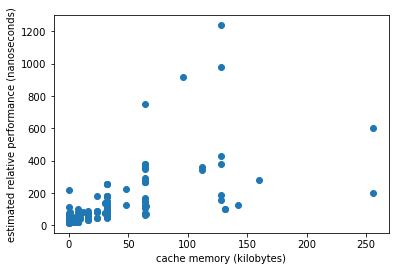

In [52]:
data = label_encoded_matrix
plt.scatter(data[:,5], data[:,9])
plt.xlabel('cache memory (kilobytes)')
plt.ylabel('estimated relative performance (nanoseconds)')

Text(0, 0.5, 'estimated relative performance (nanoseconds)')

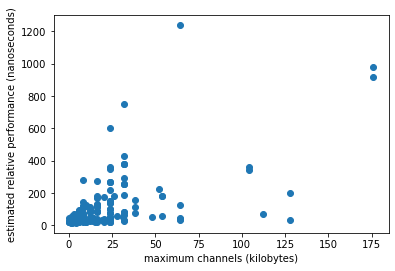

In [53]:
data = label_encoded_matrix
plt.scatter(data[:,7], data[:,9])
plt.xlabel('maximum channels (kilobytes)')
plt.ylabel('estimated relative performance (nanoseconds)')

Text(0, 0.5, 'estimated relative performance (nanoseconds)')

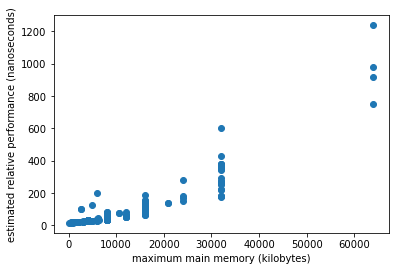

In [54]:
data = label_encoded_matrix
plt.scatter(data[:,4], data[:,9])
plt.xlabel('maximum main memory (kilobytes)')
plt.ylabel('estimated relative performance (nanoseconds)')

Text(0, 0.5, 'maximum channels (units)')

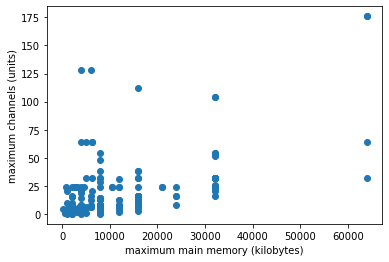

In [55]:
data = label_encoded_matrix
plt.scatter(data[:,4], data[:,7])
plt.xlabel('maximum main memory (kilobytes)')
plt.ylabel('maximum channels (units)')

Text(0, 0.5, 'minimum channels (units)')

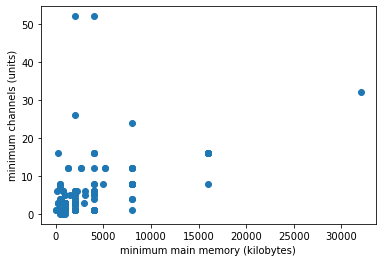

In [56]:
data = label_encoded_matrix
plt.scatter(data[:,3], data[:,6])
plt.xlabel('minimum main memory (kilobytes)')
plt.ylabel('minimum channels (units)')

## (3 points)

Which range-normalized numerical attributes have the greatest estimated covariance? What is their estimated covariance? Create a scatter plot of these range-normalized attributes.

In [57]:
def fetchGreatestCovariancePair(m, okay_indices=None):
    pair_data = fetchPairs(m, covariance, None, "covariance", okay_indices)
    greatest_pair_data = pair_data[0]
    return greatest_pair_data

range_norm_matrix = rangeNormalize(label_encoded_matrix)
numerical_attribute_indecies = [2,3,4,5,6,7,8,9]
greatest_range_norm_pair_data = fetchGreatestCovariancePair(range_norm_matrix, numerical_attribute_indecies)

d = greatest_range_norm_pair_data
print("The range-normalized numerical attributes with the greatest estimated covariance:\nColumns: '{!s}' ({!s}) and '{!s}'({!s})\nCovariance of: {:.2f}".format(
    d['x_i'],
    DATA_COL_NAME_DICT[d['x_i']],
    d['x_j'],
    DATA_COL_NAME_DICT[d['x_j']],
    d["covariance"],))

The range-normalized numerical attributes with the greatest estimated covariance:
Columns: 'MMAX' (maximum main memory in kilobytes) and 'PRP'(published relative performance)
Covariance of: 0.02


### Scatter Plot of Greatest Range Normalization Pair

Text(0.5, 1.0, 'Greatest Range Normalization Pair')

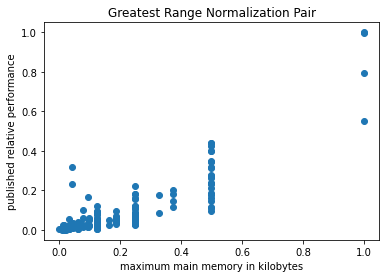

In [58]:
# create scatter plot greatest range normalization pair
data = range_norm_matrix
plt.scatter(data[:,DATA_COL_NAMES.index(greatest_range_norm_pair_data['x_i'])], data[:,DATA_COL_NAMES.index(greatest_range_norm_pair_data['x_j'])])
plt.xlabel(DATA_COL_NAME_DICT[greatest_range_norm_pair_data['x_i']])
plt.ylabel(DATA_COL_NAME_DICT[greatest_range_norm_pair_data['x_j']])
plt.title('Greatest Range Normalization Pair')

## (3 points)

Which Z-score-normalized numerical attributes have the greatest correlation? What is their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [59]:
def fetchGreatestCorrelationPair(m, okay_indices=None):
    pair_data = fetchPairs(m, correlation, None, "correlation", okay_indices)
    greatest_pair_data = pair_data[0]
    return greatest_pair_data

zscore_norm_matrix = zScoreNormalize(label_encoded_matrix)
numerical_attribute_indecies = [2,3,4,5,6,7,8,9]
greatest_zscore_norm_pair_data = fetchGreatestCorrelationPair(zscore_norm_matrix, numerical_attribute_indecies)

d = greatest_zscore_norm_pair_data

print("The Z-Score normalized numerical attributes with the greatest estimated correlation:\nColumns: '{!s}' ({!s}) and '{!s}'({!s})\nCorrelation of: {:.2f}".format(
    d['x_i'],
    DATA_COL_NAME_DICT[d['x_i']],
    d['x_j'],
    DATA_COL_NAME_DICT[d['x_j']],
    d["correlation"],))

The Z-Score normalized numerical attributes with the greatest estimated correlation:
Columns: 'PRP' (published relative performance) and 'ERP'(estimated relative performance from the original article)
Correlation of: 0.97


### Scatter Plot of Greatest Correlation Z-Score Normalization Pair

Text(0.5, 1.0, 'Greatest Z-Score Normalized Correlation Pair')

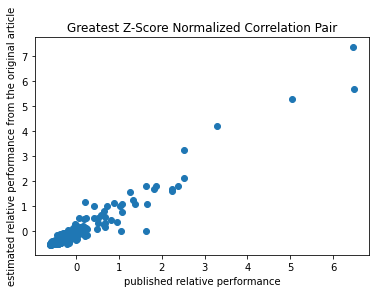

In [60]:
# create scatter plot greatest z-score normalization pair
data = zscore_norm_matrix
plt.scatter(data[:,DATA_COL_NAMES.index(greatest_zscore_norm_pair_data['x_i'])], data[:,DATA_COL_NAMES.index(greatest_zscore_norm_pair_data['x_j'])])
plt.xlabel(DATA_COL_NAME_DICT[greatest_zscore_norm_pair_data['x_i']])
plt.ylabel(DATA_COL_NAME_DICT[greatest_zscore_norm_pair_data['x_j']])
plt.title('Greatest Z-Score Normalized Correlation Pair')

## (3 points)

Which Z-score-normalized numerical attributes have the smallest correlation? What is their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [61]:
def fetchSmallestCorrelationPair(m, okay_indices=None):
    pair_data = fetchPairs(m, correlation, None, "correlation", okay_indices, False)
    smallest_pair_data = pair_data[0]
    return smallest_pair_data

zscore_norm_matrix = zScoreNormalize(label_encoded_matrix)
numerical_attribute_indecies = [2,3,4,5,6,7,8,9]
smallest_zscore_norm_pair_data = fetchSmallestCorrelationPair(zscore_norm_matrix, numerical_attribute_indecies)

d = smallest_zscore_norm_pair_data

print("The Z-Score normalized numerical attributes with the smallest estimated correlation:\nColumns: '{!s}' ({!s}) and '{!s}'({!s})\nCorrelation of: {:.2f}".format(
    d['x_i'],
    DATA_COL_NAME_DICT[d['x_i']],
    d['x_j'],
    DATA_COL_NAME_DICT[d['x_j']],
    d["correlation"],))

The Z-Score normalized numerical attributes with the smallest estimated correlation:
Columns: 'MYCT' (machine cycle time in nanoseconds) and 'MMAX'(maximum main memory in kilobytes)
Correlation of: -0.38


### Scatter Plot of Smallest Z-Score Normalization Correlation Pair

Text(0.5, 1.0, 'Smallest Z-Score Normalization Correlation Pair')

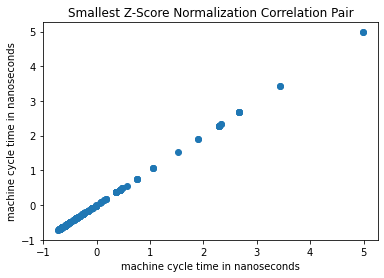

In [62]:
# create scatter plot smallest z-score normalization pair
data = zscore_norm_matrix
plt.scatter(data[:,DATA_COL_NAMES.index(smallest_zscore_norm_pair_data['x_i'])], data[:,DATA_COL_NAMES.index(smallest_zscore_norm_pair_data['x_i'])])
plt.xlabel(DATA_COL_NAME_DICT[smallest_zscore_norm_pair_data['x_i']])
plt.ylabel(DATA_COL_NAME_DICT[smallest_zscore_norm_pair_data['x_i']])
plt.title('Smallest Z-Score Normalization Correlation Pair')

## (3 points)

How many pairs of features have correlation greater than or equal to 0.5?

In [63]:
def thresholdCheck(val):
    if val >= 0.5: return True
    return False
d = fetchPairs(label_encoded_matrix, correlation, thresholdCheck, "correlation")

print("{!s} pairs of features have a correlation greater then or equal to 0.5".format(len(d)))

20 pairs of features have a correlation greater then or equal to 0.5


### Correlation pairs greater then or equal to 0.5

In [64]:
def thresholdCheck(val):
    if val >= 0.5: return True
    return False
fetchPairs(label_encoded_matrix, correlation, thresholdCheck, "correlation")

[{'x_i': 'Vendor Name', 'x_j': 'Model Name', 'correlation': 0.983740021435977},
 {'x_i': 'PRP', 'x_j': 'ERP', 'correlation': 0.9664716584437554},
 {'x_i': 'MMAX', 'x_j': 'ERP', 'correlation': 0.9012023724206504},
 {'x_i': 'MMAX', 'x_j': 'PRP', 'correlation': 0.8630041243651347},
 {'x_i': 'MMIN', 'x_j': 'ERP', 'correlation': 0.8192915433705625},
 {'x_i': 'MMIN', 'x_j': 'PRP', 'correlation': 0.7949313405266917},
 {'x_i': 'MMIN', 'x_j': 'MMAX', 'correlation': 0.7581573478037238},
 {'x_i': 'CACH', 'x_j': 'PRP', 'correlation': 0.6626414266783198},
 {'x_i': 'CACH', 'x_j': 'ERP', 'correlation': 0.6486202553696466},
 {'x_i': 'CHMIN', 'x_j': 'ERP', 'correlation': 0.6105802214479128},
 {'x_i': 'CHMIN', 'x_j': 'PRP', 'correlation': 0.6089032834114063},
 {'x_i': 'CHMAX', 'x_j': 'PRP', 'correlation': 0.6052092928126743},
 {'x_i': 'CHMAX', 'x_j': 'ERP', 'correlation': 0.5921555647418641},
 {'x_i': 'CACH', 'x_j': 'CHMIN', 'correlation': 0.5822454590800029},
 {'x_i': 'MMAX', 'x_j': 'CHMIN', 'correlati

## (3 points)

How many pairs of features have negative estimated covariance?

In [65]:
# calculate negative estimated covariance
def thresholdCheck(val):
    if val < 0: return True
    return False
d = fetchPairs(label_encoded_matrix, covariance, thresholdCheck, "covariance")
print("{!s} pairs of features have a covariance less than 0".format(len(d)))

15 pairs of features have a covariance less than 0


### Pairs of features with negative estimated covariance

In [66]:
def thresholdCheck(val):
    if val < 0: return True
    return False
fetchPairs(label_encoded_matrix, covariance, thresholdCheck, "covariance")

[{'x_i': 'Vendor Name', 'x_j': 'CHMAX', 'covariance': -1.8992914979756885},
 {'x_i': 'Model Name', 'x_j': 'CHMAX', 'covariance': -7.19230769230772},
 {'x_i': 'Vendor Name', 'x_j': 'ERP', 'covariance': -23.23734817813752},
 {'x_i': 'Vendor Name', 'x_j': 'PRP', 'covariance': -28.712297570850147},
 {'x_i': 'Vendor Name', 'x_j': 'MYCT', 'covariance': -143.7834008097165},
 {'x_i': 'MYCT', 'x_j': 'CHMIN', 'covariance': -534.1401591829224},
 {'x_i': 'Model Name', 'x_j': 'MYCT', 'covariance': -1632.3028846153845},
 {'x_i': 'MYCT', 'x_j': 'CHMAX', 'covariance': -1694.933106367316},
 {'x_i': 'Vendor Name', 'x_j': 'MMIN', 'covariance': -2480.4048582996006},
 {'x_i': 'MYCT', 'x_j': 'CACH', 'covariance': -3394.2999401913867},
 {'x_i': 'Model Name', 'x_j': 'MMIN', 'covariance': -5294.278846153839},
 {'x_i': 'MYCT', 'x_j': 'ERP', 'covariance': -11615.864349466328},
 {'x_i': 'MYCT', 'x_j': 'PRP', 'covariance': -12854.65377714392},
 {'x_i': 'MYCT', 'x_j': 'MMIN', 'covariance': -338828.4264814134},
 {'x

## (2 points)

What is the total variance of the data?

In [67]:
total_variance = 0
for i in range(label_encoded_matrix.shape[1]):
    total_variance += covariance(label_encoded_matrix[:,i])
total_variance

152680597.473132

## (2 points)

What is the total variance of the data, restricted to the five features that have the greatest estimated variance?

In [68]:
# list used to store the variance for 
restricted_variance_list = list()

for i in range(label_encoded_matrix.shape[1]):
    restricted_variance_list.append(covariance(label_encoded_matrix[:,i]))

restricted_variance_list.sort(reverse=True)

restricted_variance = 0

for i in restricted_variance_list[:5]:
    restricted_variance += i

restricted_variance

152674510.55207935